In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [8]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [10]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [11]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [14]:
from sqlalchemy import extract

results_precip = []
results_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
print(results_precip)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [15]:
precip_june = list(np.ravel(results_precip))

In [16]:
df = pd.DataFrame(results_precip, columns=['date', 'June Precipitation'])
df.set_index(df['date'], inplace=True)

In [17]:
df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


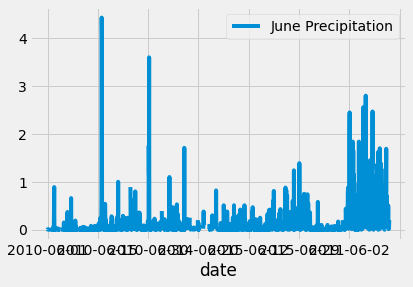

In [24]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# df.plot.bar()
# plt.tight_layout()
# plt.show()

df.plot()
plt.show()

In [28]:
results_precip = []
results_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
# print(results_precip)

precip_december = list(np.ravel(results_precip))

df = pd.DataFrame(results_precip, columns=['date', 'December Precipitation'])
df.set_index(df['date'], inplace=True)

df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


## D1: Determine the Summary Statistics for June

In [ ]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = []
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [ ]:
#  3. Convert the June temperatures to a list.
temps_june = list(np.ravel(results_june))

In [ ]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results_june, columns=['date', 'June Temps'])
df.set_index(df['date'], inplace=True)

In [ ]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

## D2: Determine the Summary Statistics for December

In [ ]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_december = []
results_december = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [ ]:
# 7. Convert the December temperatures to a list.
temps_december = list(np.ravel(results_december))

In [ ]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results_december, columns=['date', 'December Temps'])
df.set_index(df['date'], inplace=True)

In [ ]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()